# 1.Introduction
- This project focuses on analyzing the relationships between pharmaceutical drugs, their associated side effects, and the medical conditions they aim to treat. By leveraging data analysis and machine learning techniques, the objective is to identify potentially unsafe drugs, explore patterns in CSA classifications and pregnancy risk categories, and uncover insights that can support healthcare decision-making. The study includes visualizations, safety scoring, and predictive modeling to enhance understanding of drug safety and efficacy.

# 1.1 Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Data loading

In [ ]:
df=pd.read_csv('drugs_side_effects_drugs_com.csv')

In [ ]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset has 2931 rows and 17 columns


## 1.3 Understanding the data

In [ ]:
df.head(5)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [ ]:
df.tail(5)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html
2930,setmelanotide,Weight Loss,hives ; difficult breathing; swelling of your ...,setmelanotide,Melanocortin receptor agonists,Imcivree,0%,Rx,NaN,N,NaN,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/obesity.html


In [ ]:
print("column:")
print(df.columns)

column:
Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [ ]:
# Show the main information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [ ]:
df.describe()

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


# 1.4 Removing the unnecessary Column from the Dataset

In [ ]:
# Droping the columns
df.drop(columns = ['brand_names', 'drug_link', 'medical_condition_url'], inplace = True)

In [ ]:
# Print the total number of missing values
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
activity,0
rx_otc,1
pregnancy_category,229
csa,0
alcohol,1554


In [ ]:
#find the dupilcated rows based on all columns
duplicate = df[df.duplicated()]

In [ ]:
#count the dupliacte rows
duplicate.shape

(0, 14)

In [ ]:
#print the duplicate rows
print(duplicate)

Empty DataFrame
Columns: [drug_name, medical_condition, side_effects, generic_name, drug_classes, activity, rx_otc, pregnancy_category, csa, alcohol, related_drugs, medical_condition_description, rating, no_of_reviews]
Index: []


# 2. Data Cleaning
- Data Type Conversion
- Missing Values Handling


In [ ]:
df.head(2)

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0


## 2.1 Data Type Conversion

In [ ]:
df['activity'].unique()

array(['87%', '82%', '48%', '41%', '39%', '35%', '30%', '26%', '20%',
       '17%', '13%', '12%', '9%', '8%', '7%', '6%', '5%', '4%', '3%',
       '2%', '1%', '0%', '100%', '95%', '51%', '40%', '38%', '36%', '32%',
       '31%', '27%', '24%', '23%', '16%', '14%', '10%', '97%', '80%',
       '71%', '61%', '60%', '57%', '53%', '50%', '37%', '34%', '33%',
       '18%', '11%', '83%', '75%', '74%', '54%', '98%', '85%', '84%',
       '64%', '19%', '79%', '67%', '42%', '15%', '94%', '78%', '59%',
       '55%', '28%', '92%', '88%', '49%', '22%', '96%', '63%', '45%',
       '43%', '46%', '25%', '21%', '44%', '47%', '29%', '66%', '99%',
       '68%', '73%', '72%', '65%', '52%', '58%', '86%', '62%', '91%',
       '90%'], dtype=object)

In [ ]:
df['activity'].value_counts()

,count
activity,
0%,895
1%,506
2%,289
3%,200
4%,117
...,...
72%,1
86%,1
62%,1


In [ ]:
#convert 'activity' to string, remove white spaces and '%' character, then convert to float and divide by 100
df['activity'] = df['activity'].str.strip().str.rstrip('%').astype(float)/100

In [ ]:
#Display the updated 'activity' column
print(df['activity'])

0       0.87
1       0.82
2       0.48
3       0.41
4       0.39
        ... 
2926    0.02
2927    0.01
2928    0.00
2929    0.00
2930    0.00
Name: activity, Length: 2931, dtype: float64


## 2.3 Handling Missing values

In [ ]:
# Print the total number of missing values
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
activity,0
rx_otc,1
pregnancy_category,229
csa,0
alcohol,1554


In [ ]:
# Replace Missing Values with "No Side Effects"
# If side_effects being NaN means there are no side effects reported:
df['side_effects'] = df['side_effects'].fillna("No Side Effects")
# Impute with Mode (Most Common Value)
# If side_effects are categorical or repetitive, impute with the most common side effect:
mode_side_effect = df['side_effects'].mode()[0]
df['side_effects'] = df['side_effects'].fillna(mode_side_effect)

df['side_effects'].isnull().sum()

np.int64(0)

In [ ]:
#fill the null values with?
df['generic_name'] = df['generic_name'].replace(np.nan, 'unknown', regex=True)

In [ ]:
#fill the null values with undefined for 'drug_class' column
df['drug_classes'] = df['drug_classes'].fillna('unknown')

In [ ]:
#for these two columns, we already have some category values from dataset description
#for RX_OTC
df['rx_otc'].unique()

array(['Rx', 'Rx/OTC', 'OTC', nan], dtype=object)

In [ ]:
#for pregnacy category
df['pregnancy_category'].unique()

array(['D', 'C', 'X', 'B', 'N', nan, 'A'], dtype=object)

In [ ]:
#for csa
df['csa'].unique()

array(['N', '2', '4', 'U', 'M', '5', '3'], dtype=object)

In [ ]:
#fill the null values with unknown as a basic value
df['rx_otc'] = df['rx_otc'].fillna('unknown')

In [ ]:
#fill the null value with unknown as a basic value
df['pregnancy_category'] = df['pregnancy_category'].fillna('unknown')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors='coerce')
print(df.head())
dfa = df.copy()

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  activity rx_otc  \
0         Miscellaneous antimalarials, Tetracyclines      0.87     Rx   
1  Aldosterone receptor antagonists, Potassium-sp...      0.82     Rx   
2                                      Tetracyclines      0.48     Rx   
3  Miscell

In [ ]:
#In the alcohol column, we have X and null(NaN) values. because the drug can interact with alcohol or not.
#So, we will replace X with 1 and NaN with 0
df['alcohol'] = df['alcohol'].replace('X', 1)
df['alcohol'] = df['alcohol'].fillna(0)

<ipython-input-28-983588004803>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['alcohol'] = df['alcohol'].replace('X', 1)


In [ ]:
df['alcohol'] = df['alcohol'].astype(int)

In [ ]:
# Replace with "Unknown Drug"
# If missing values represent no related drug information
df['related_drugs']= df['related_drugs'].fillna("Unknown Drug")

In [ ]:
# Fill the null values with 0 as a base for 'rating' and 'no_of_reviews' columns
# It will show that there are no information about it
df["rating"] = df['rating'].fillna('0')
df["no_of_reviews"] = df['no_of_reviews'].fillna('0')


## 2.4 Converting type catagorical to numeric

In [ ]:
df['rating'] = df['rating'].astype(float)
df['no_of_reviews'] = df['no_of_reviews'].astype(float)

In [ ]:
# Checking for Missing Values after handling
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0
alcohol,0


In [ ]:
df.head(3)


,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2931 non-null   object 
 3   generic_name                   2931 non-null   object 
 4   drug_classes                   2931 non-null   object 
 5   activity                       2931 non-null   float64
 6   rx_otc                         2931 non-null   object 
 7   pregnancy_category             2931 non-null   object 
 8   csa                            2931 non-null   object 
 9   alcohol                        2931 non-null   int64  
 10  related_drugs                  2931 non-null   object 
 11  medical_condition_description  2931 non-null   object 
 12  rating                         2931 non-null   f

In [ ]:
df.to_csv('drug_preprocess.csv')

# 3. Basic Data Exploration

In [ ]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0


In [ ]:
df.describe()

,activity,alcohol,rating,no_of_reviews
count,2931.000000,2931.000000,2931.000000,2931.000000
mean,0.084504,0.469806,3.686557,40.618560
std,0.169333,0.499173,3.797851,141.046113
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.020000,0.000000,3.300000,1.000000
75%,0.070000,1.000000,7.300000,15.000000
max,1.000000,1.000000,10.000000,2934.000000


In [ ]:
#Check Unique Values in Categorical Columns
df['drug_classes'].value_counts().head(10)
df['medical_condition'].value_counts().head(10)

,count
medical_condition,
Pain,264
Colds & Flu,245
Acne,238
Hypertension,177
Osteoarthritis,129
Hayfever,124
Eczema,122
AIDS/HIV,109
Diabetes (Type 2),104


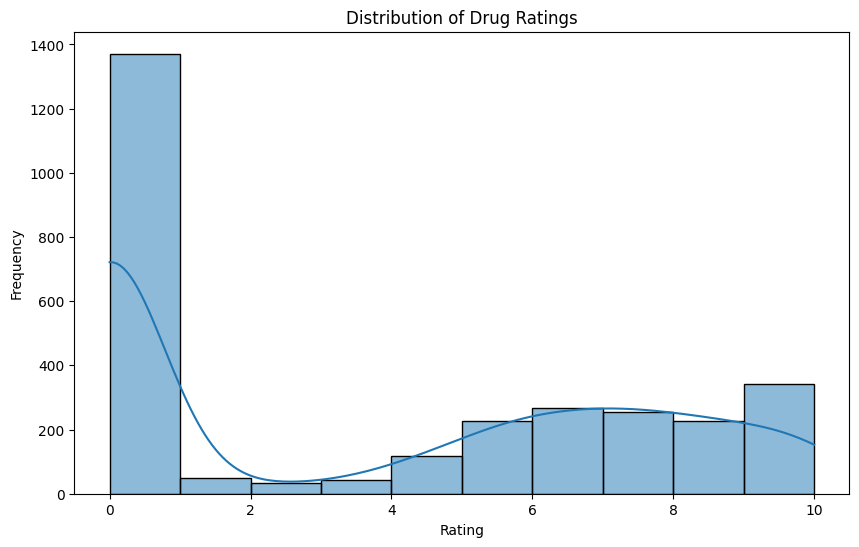

In [ ]:
#Distribution of Ratings (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

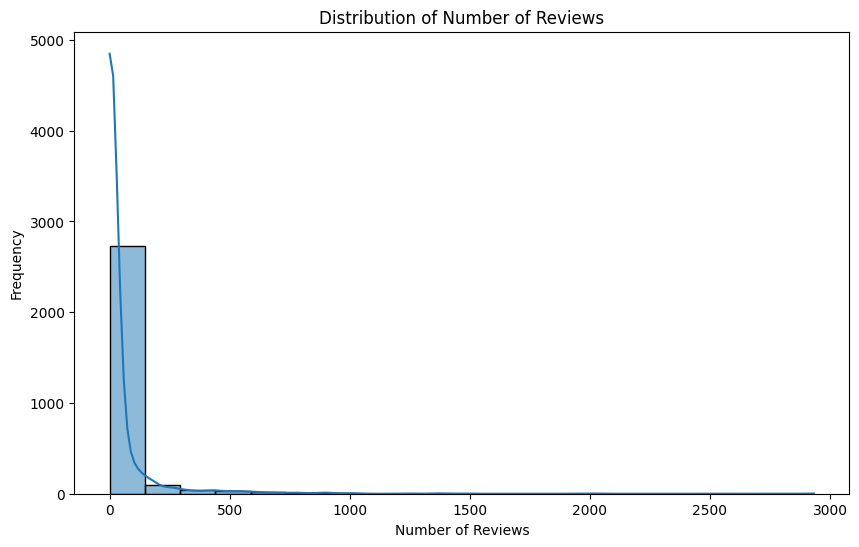

In [ ]:
#Distribution of Number of Reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['no_of_reviews'].dropna(), bins=20, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

## Analyzing Relationships

In [ ]:
top_drugs = df.groupby('medical_condition')['drug_name'].value_counts().nlargest(10)
print(top_drugs)

medical_condition  drug_name     
Acne               minocycline       2
Eczema             fluocinolone      2
Herpes             acyclovir         2
ADHD               Adderall          1
                   Adderall XR       1
                   Adhansia XR       1
                   Adzenys ER        1
                   Adzenys XR-ODT    1
                   Aptensio XR       1
                   Azstarys          1
Name: count, dtype: int64


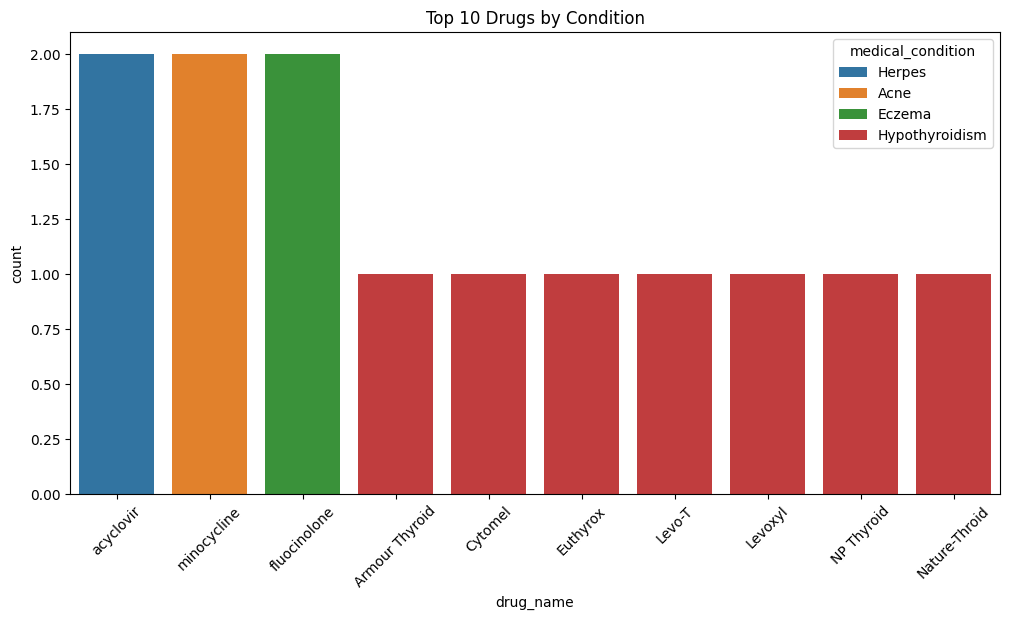

In [ ]:
#Top Drugs by Condition
top_drugs = df.groupby(['medical_condition', 'drug_name']).size().reset_index(name='count')
top_drugs = top_drugs.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_drugs, x='drug_name', y='count', hue='medical_condition')
plt.title('Top 10 Drugs by Condition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Most Common Side Effects
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

side_effects
No Side Effects                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 124
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may hav

<ipython-input-45-b5f87781c3fd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=short_labels, y=top_side_effects.values, palette="Blues_d")


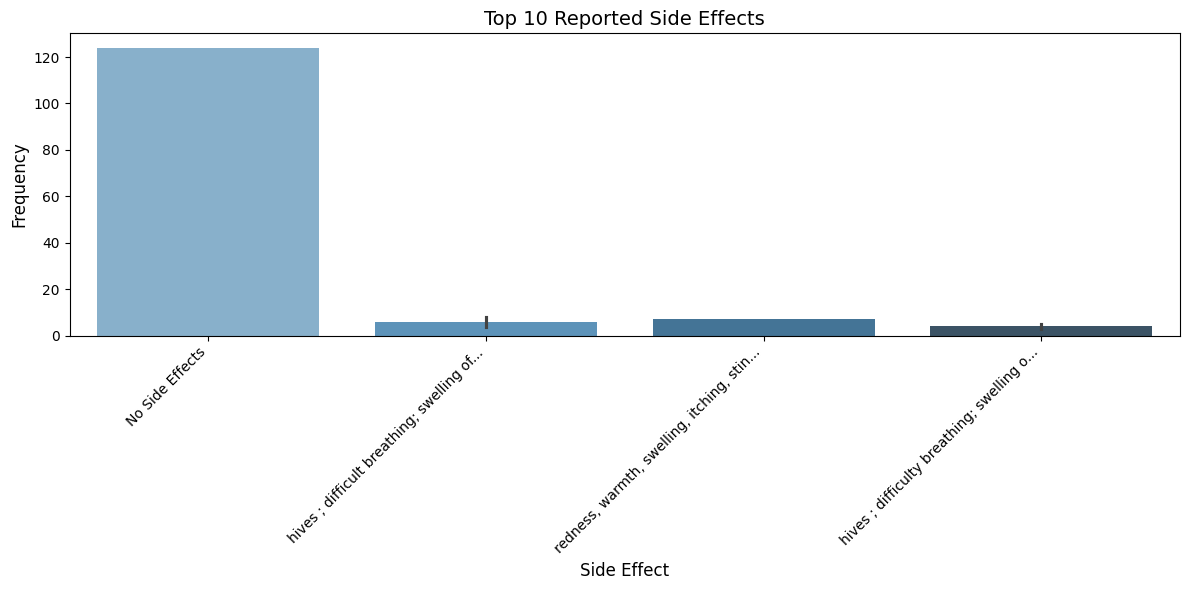

In [ ]:
# Get top 10 side effects
top_side_effects = df['side_effects'].value_counts().head(10)

# Truncate long text for better display
short_labels = [s[:40] + '...' if len(s) > 40 else s for s in top_side_effects.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=short_labels, y=top_side_effects.values, palette="Blues_d")

plt.title('Top 10 Reported Side Effects', fontsize=14)
plt.xlabel('Side Effect', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Get top 20 most frequent drug classes
top_classes = df['drug_classes'].value_counts().nlargest(20).index

# Filter DataFrame to only include these
df_top_classes = df[df['drug_classes'].isin(top_classes)]

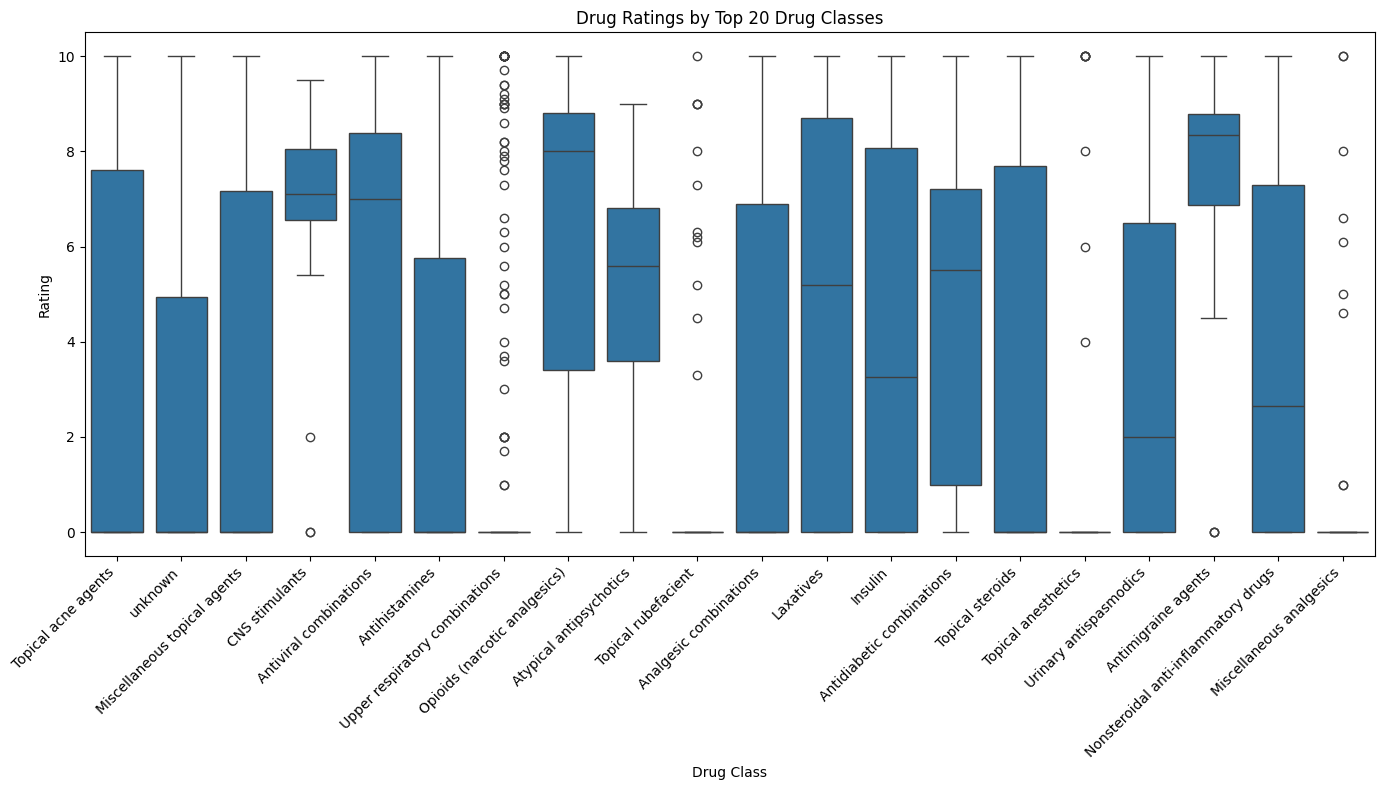

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='drug_classes', y='rating', data=df_top_classes)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Drug Ratings by Top 20 Drug Classes')
plt.xlabel('Drug Class')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

## 4. Advance Data Analysis

In [ ]:
data=pd.read_csv('drug_preprocess.csv')

In [ ]:
data.head(10)

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0
5,5,Aldactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.35,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.6,8.0
6,6,tretinoin,Acne,hives ; difficult breathing; swelling of your ...,tretinoin topical,Topical acne agents,0.30,Rx,C,N,0,Unknown Drug,Acne Other names: Acne Vulgaris; Blackheads; B...,7.7,439.0
7,7,isotretinoin,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.26,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,8.0,999.0
8,8,Bactrim,Acne,"skin rash, fever, swollen glands, joint pain, ...",sulfamethoxazole and trimethoprim,Sulfonamides,0.20,Rx,D,N,1,Unknown Drug,Acne Other names: Acne Vulgaris; Blackheads; B...,8.5,96.0
9,9,Retin-A,Acne,hives; difficult breathing; swelling of your f...,Retin-A,Topical acne agents,0.17,Rx,C,N,0,Unknown Drug,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,86.0


# 4.1 Top 10 Most Reviewed Drugs

<ipython-input-50-a33e99f24ba1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed_drugs.values, y=top_reviewed_drugs.index, palette="crest")


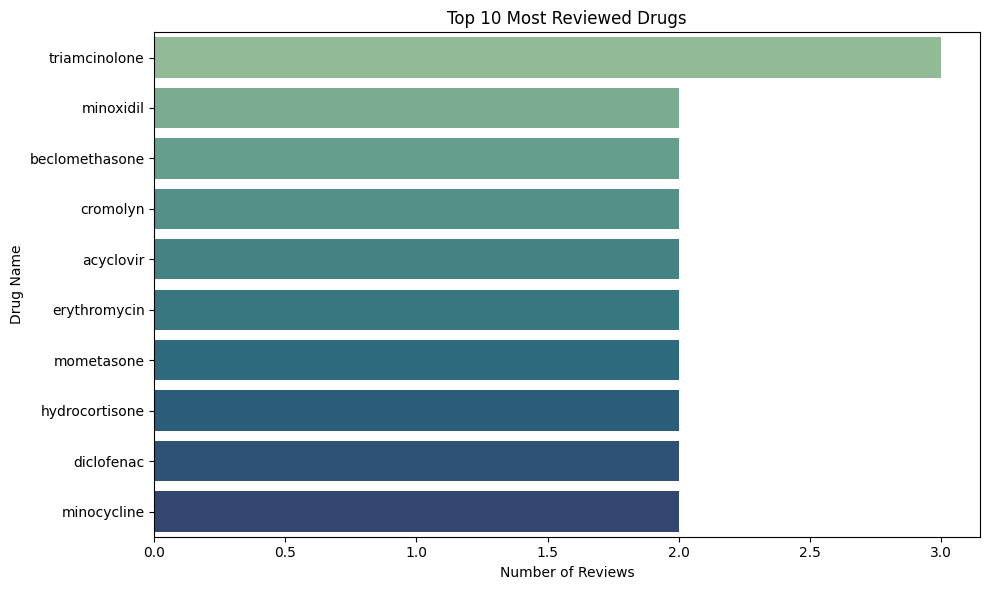

In [ ]:
# Count and display the top 10 most reviewed drugs
top_reviewed_drugs = data['drug_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_reviewed_drugs.values, y=top_reviewed_drugs.index, palette="crest")
plt.title("Top 10 Most Reviewed Drugs")
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

Insight: These drugs are highly used and often reviewed by patients, reflecting their popularity and potential need for deeper clinical evaluation.

# 4.2 Most Common Medical Conditions

<ipython-input-51-8d4d88d81fa4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")


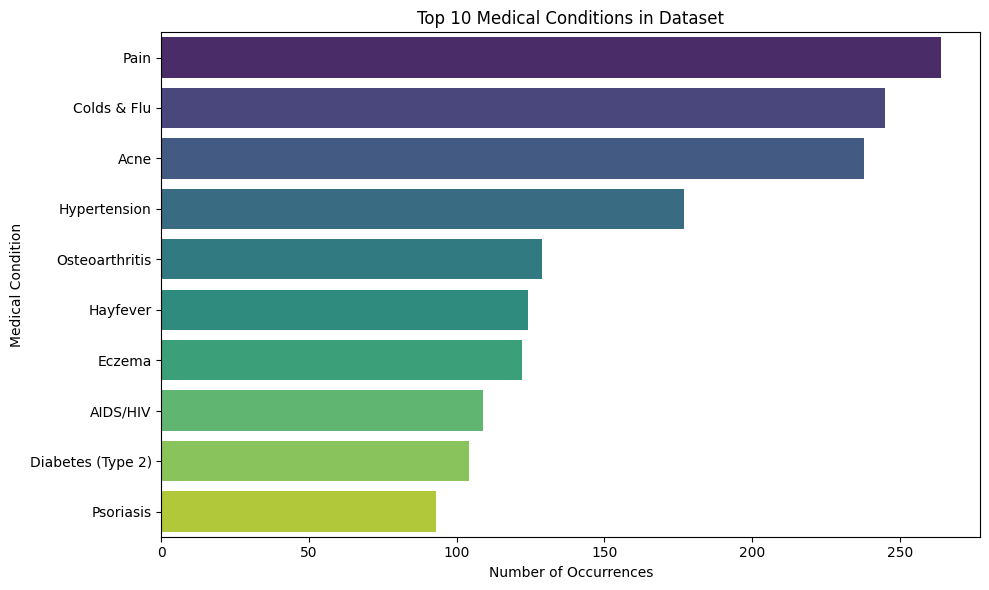

In [ ]:
# Get top 10 most frequent medical conditions
top_conditions = data['medical_condition'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")
plt.title("Top 10 Medical Conditions in Dataset")
plt.xlabel("Number of Occurrences")
plt.ylabel("Medical Condition")
plt.tight_layout()
plt.show()

 Insight: These are the conditions most commonly treated in the dataset — useful for healthcare demand analysis.

# 4.3 Top-Rated Drugs per Condition

In [ ]:
# Filter: Only drugs with at least 20 reviews for reliability
popular_rated = data[data['no_of_reviews'] >= 20]

# Get top drugs per condition (with rating >= 9)
top_rated = popular_rated[popular_rated['rating'] >= 9]
top_rated = top_rated.sort_values(by=['medical_condition', 'rating'], ascending=[True, False])

# Display top entries
top_rated[['drug_name', 'medical_condition', 'rating', 'no_of_reviews']].head(10)

,drug_name,medical_condition,rating,no_of_reviews
260,Desoxyn,ADHD,9.4,35.0
297,Stribild,AIDS/HIV,9.5,89.0
307,cobicistat / elvitegravir / emtricitabine / te...,AIDS/HIV,9.5,89.0
298,Atripla,AIDS/HIV,9.1,103.0
324,efavirenz / emtricitabine / tenofovir,AIDS/HIV,9.1,107.0
536,tramadol,Anxiety,9.3,106.0
555,nefazodone,Anxiety,9.3,39.0
540,clorazepate,Anxiety,9.1,44.0
865,ephedrine / guaifenesin,Colds & Flu,9.2,21.0
1378,opium,Diarrhea,9.6,28.0


Insight: Helps identify drugs that are not only rated high but also backed by a good number of reviews — useful for decision-making in prescriptions.

# 4.4 Pregnancy Safety Analysis

<ipython-input-53-09cf318401ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pregnancy_data, x='pregnancy_category', y='rating', palette="pastel")


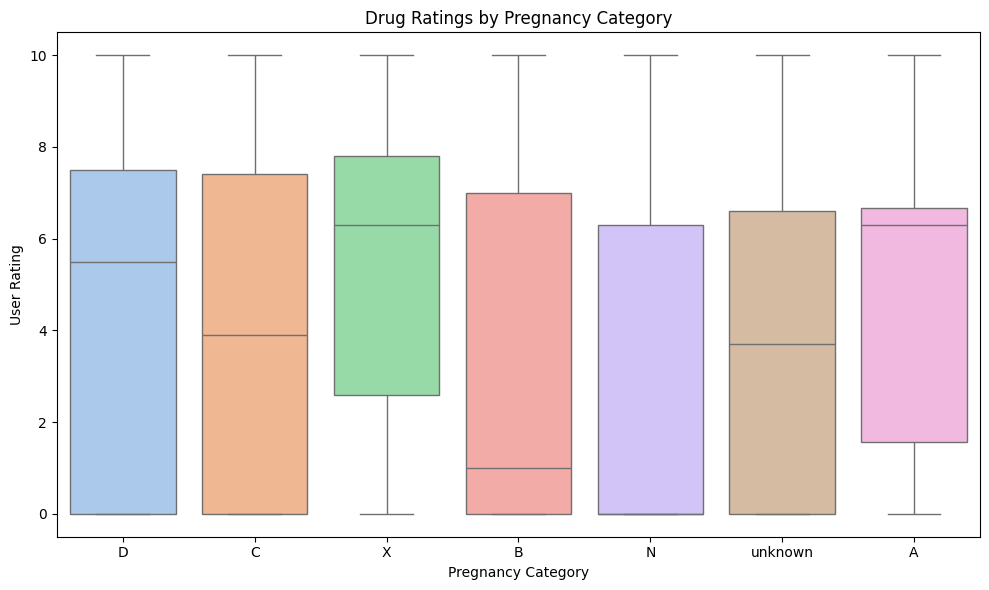

In [ ]:
# Filter rows with valid pregnancy category
pregnancy_data = df[df['pregnancy_category'].notnull() & (df['pregnancy_category'] != 'Unknown')]

# Plot ratings grouped by pregnancy category
plt.figure(figsize=(10,6))
sns.boxplot(data=pregnancy_data, x='pregnancy_category', y='rating', palette="pastel")
plt.title("Drug Ratings by Pregnancy Category")
plt.xlabel("Pregnancy Category")
plt.ylabel("User Rating")
plt.tight_layout()
plt.show()

Insight: Category 'A' is considered safest. This chart shows how patient ratings differ across safety levels, supporting maternal healthcare policy.



# 4.5 Controlled Substance Risk Analysis

<ipython-input-54-ead88e32599c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=csa_counts.index, y=csa_counts.values, palette='flare')


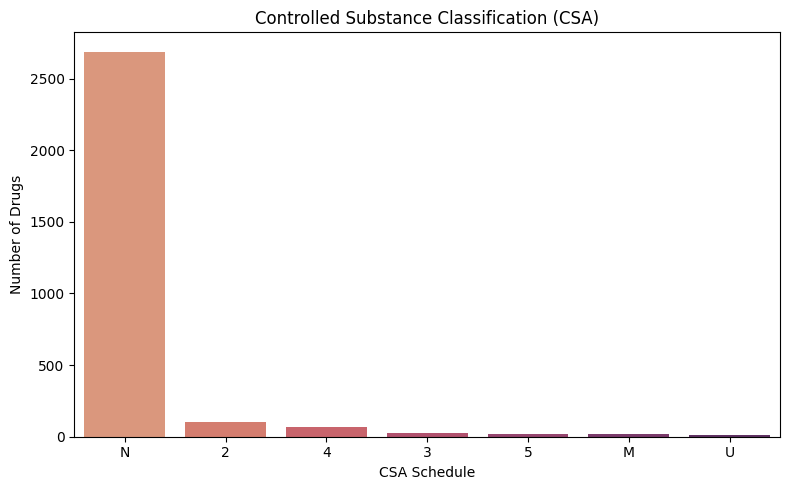

In [ ]:
# Filter drugs that have CSA classification (non-empty)
csa_data = df[df['csa'].notnull() & (df['csa'] != 'Unknown')]

# Count drugs per CSA class
csa_counts = csa_data['csa'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=csa_counts.index, y=csa_counts.values, palette='flare')
plt.title("Controlled Substance Classification (CSA)")
plt.xlabel("CSA Schedule")
plt.ylabel("Number of Drugs")
plt.tight_layout()
plt.show()

Insight: CSA Schedules I & II typically involve high abuse potential. This helps flag potentially addictive drugs needing closer regulation.

# Observation
* Pain, Colds & Flu, and Acne are the most commonly treated conditions, indicating high demand for medications in these areas.
* Chronic conditions like Hypertension, Osteoarthritis, and Diabetes (Type 2) also have significant occurrences, reflecting their widespread impact.
* Mental health conditions such as Depression, Anxiety, and Bipolar Disorder appear frequently, highlighting the importance of psychiatric medications.
* Rare conditions like Stroke, Swine Flu, and Menopause have lower occurrences, suggesting specialized treatment needs.

## 4.6 Drug Usage and Patterns

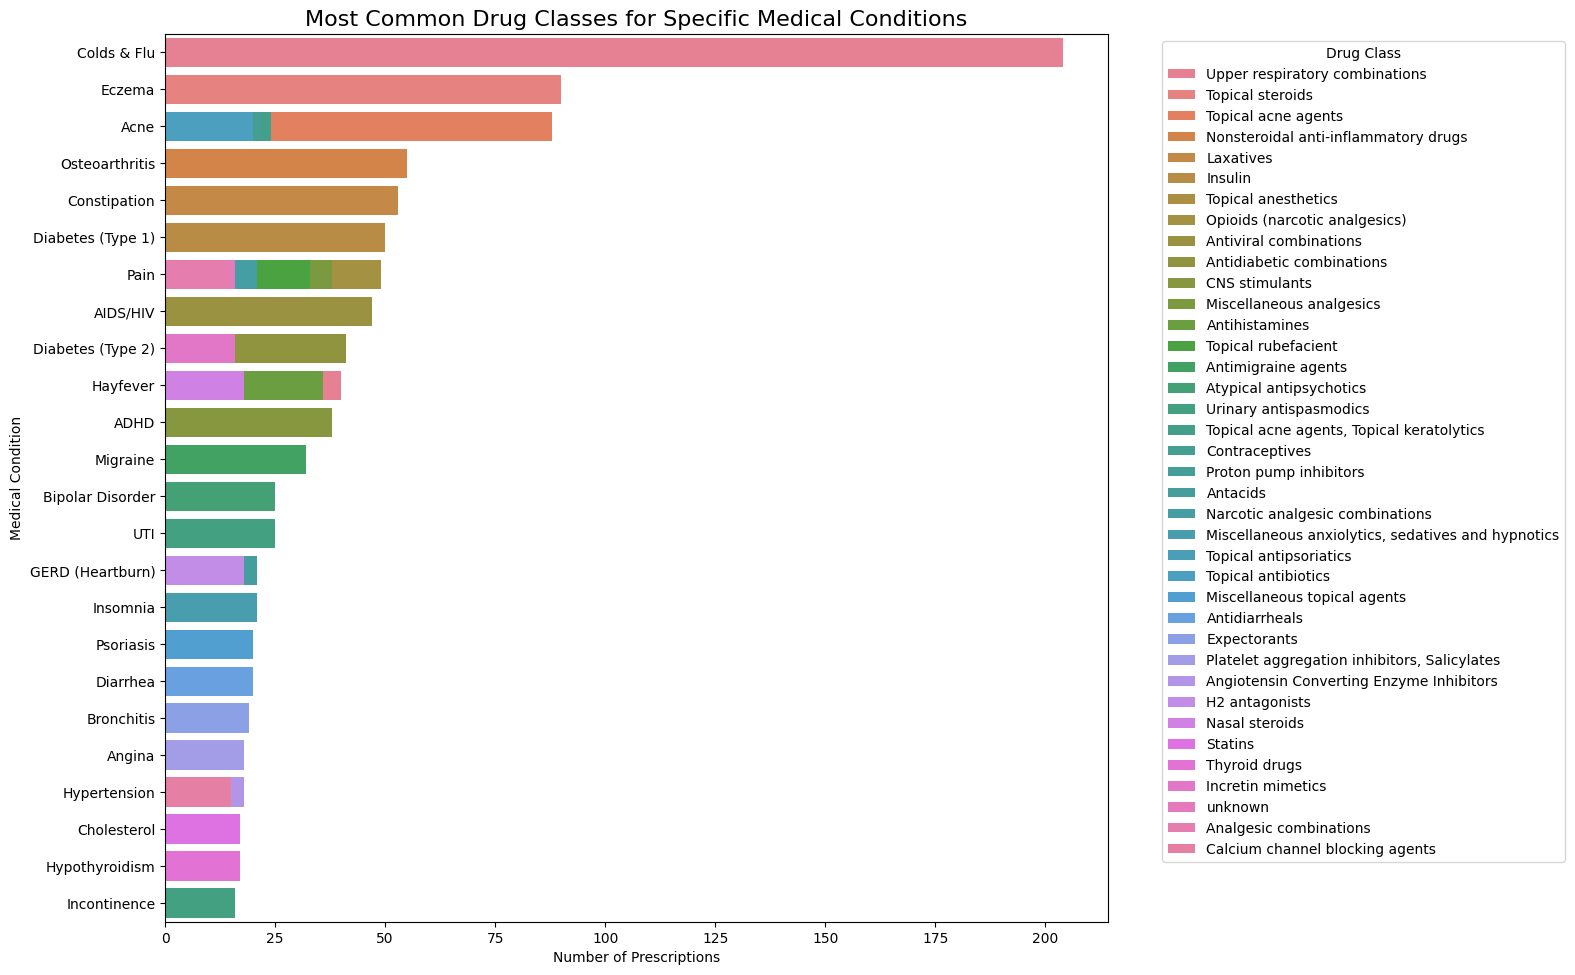

In [ ]:
# Prepare a frequency table of drug classes per medical condition
condition_class_freq = data.groupby(['medical_condition', 'drug_classes']).size().reset_index(name='count')

# Get top 40 rows (or you can adjust this number)
top_conditions = condition_class_freq.sort_values(by='count', ascending=False).head(40)

# Plot
plt.figure(figsize=(16, 10))
sns.barplot(data=top_conditions, y='medical_condition', x='count', hue='drug_classes', dodge=False)
plt.title('Most Common Drug Classes for Specific Medical Conditions', fontsize=16)
plt.xlabel('Number of Prescriptions')
plt.ylabel('Medical Condition')
plt.legend(title='Drug Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Sort by rating and number of reviews for top visibility
top_drugs = data.sort_values(by=['rating', 'no_of_reviews'], ascending=False)

# Keep only top-rated drugs for unique conditions
top_drugs_by_condition = top_drugs.drop_duplicates(subset='medical_condition', keep='first')

# Select relevant columns to display
top_drugs_by_condition = top_drugs_by_condition[['medical_condition', 'drug_name', 'rating', 'no_of_reviews']].reset_index(drop=True)

# Display as a styled table
import pandas as pd

styled_table = top_drugs_by_condition.style\
    .background_gradient(cmap='YlGnBu', subset=['rating'])\
    .bar(subset=['no_of_reviews'], color='#FFA07A')\
    .set_caption("Top-Rated Drugs by Medical Condition")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('caption-side', 'top'), ('font-size', '16px')]
    }])
styled_table

,medical_condition,drug_name,rating,no_of_reviews
0,Colds & Flu,dexbrompheniramine / pseudoephedrine,10.000000,11.000000
1,Hayfever,acrivastine / pseudoephedrine,10.000000,10.000000
2,Anxiety,Alprazolam Intensol,10.000000,8.000000
3,Constipation,Citrate of Magnesia,10.000000,6.000000
4,Migraine,Migergot,10.000000,6.000000
5,AIDS/HIV,Epzicom,10.000000,5.000000
6,Diabetes (Type 1),pramlintide,10.000000,5.000000
7,GERD (Heartburn),calcium carbonate / simethicone,10.000000,5.000000
8,Osteoporosis,conjugated estrogens,10.000000,4.000000
9,Pain,Buprenex,10.000000,4.000000


# 4.7 Drug Effectiveness

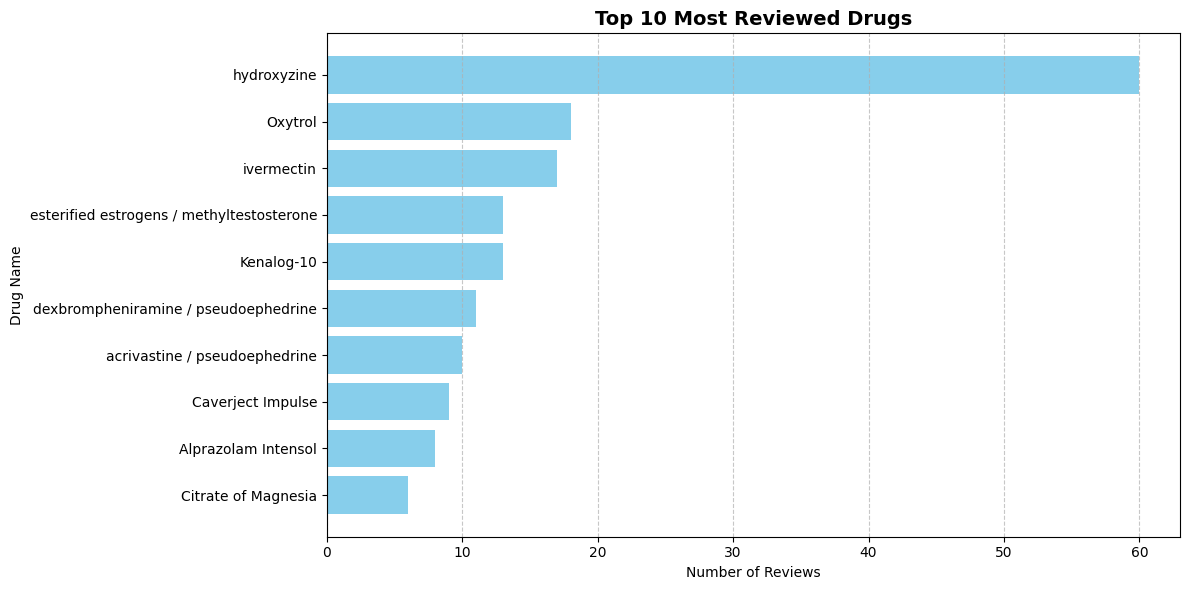

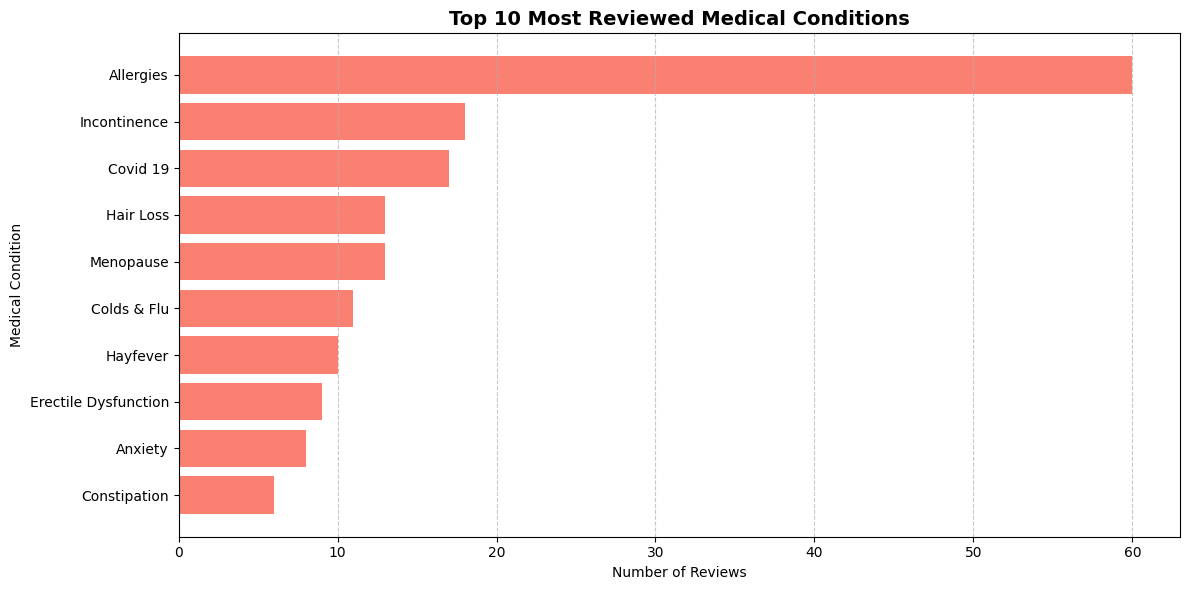

In [ ]:
# Top 10 most reviewed drugs
top_drugs = top_drugs_by_condition.nlargest(10, "no_of_reviews")
plt.figure(figsize=(12, 6))
plt.barh(top_drugs["drug_name"], top_drugs["no_of_reviews"], color='skyblue')
plt.xlabel("Number of Reviews")
plt.ylabel("Drug Name")
plt.title("Top 10 Most Reviewed Drugs", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 most reviewed medical conditions
top_conditions = top_drugs_by_condition.groupby("medical_condition")["no_of_reviews"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
plt.barh(top_conditions.index, top_conditions.values, color='salmon')
plt.xlabel("Number of Reviews")
plt.ylabel("Medical Condition")
plt.title("Top 10 Most Reviewed Medical Conditions", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📊 Drug Usage Analysis

## 🔹 Most Reviewed Drugs
The following chart displays the top 10 most reviewed drugs, indicating their widespread usage and effectiveness based on user feedback.

### Top 10 Most Reviewed Drugs

## 🔹 Medical Conditions with Highest Drug Usage
The chart below highlights the top 10 medical conditions for which drugs have received the most reviews, reflecting common health concerns and treatment demand.

### Top 10 Medical Conditions

## 🔹 Insights & Key Takeaways
- **High Review Count:** The most reviewed drugs suggest their effectiveness and widespread prescription.
- **Common Health Issues:** Conditions like **Weight Loss, Psoriasis, Rheumatoid Arthritis, and Allergies** have received the most attention.
- **Public Awareness:** The large number of reviews can indicate strong patient engagement and interest in treatment options.

> **Conclusion:** The data highlights critical areas of medical needs and patient preferences. It can be useful for healthcare professionals, pharmaceutical researchers, and policy-makers.



## 5. **Key Findings: Highest-Rated Drugs for Each Condition**
🔹 **Best-Rated Drugs (Perfect 10.0 Rating)**

  * These drugs received a 10.0 rating, indicating top effectiveness:

  * Hayfever → Acrivastine / Pseudoephedrine (10.0, 10 reviews)

  * AIDS/HIV → Epzicom (10.0, 5 reviews)

  * Diabetes (Type 1) → Pramlintide (10.0, 5 reviews)

  * Constipation → Citrate of Magnesia (10.0, 6 reviews)

  * Migraine → Migergot (10.0, 6 reviews)

  * Anxiety → Alprazolam Intensol (10.0, 8 reviews)

🔹 **Highly Rated (9.0 - 9.9 Rating)**
  * Depression → Norpramin (9.8, 5 reviews)
  * Insomnia → Quazepam (9.8, 12 reviews)
  * Hypertension → Amlodipine / Hydrochlorothiazide / Valsartan (9.7, 7 reviews)
  * Pain → Doan’s Pills Extra Strength (9.7, 8 reviews)
  * Eczema → DesOwen (9.8, 5 reviews)
  * Gout → Probenecid (9.7, 6 reviews)

🔹 **Most Reviewed High-Rated Drug**
  * Weight Loss → Adipex-P (8.9, 600 reviews)

These findings highlight the most effective drugs based on user ratings and reviews. 🚀

<ipython-input-58-57b25a236833>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="drug_classes", x="rating", data=drug_class_ratings.head(20), palette="magma")


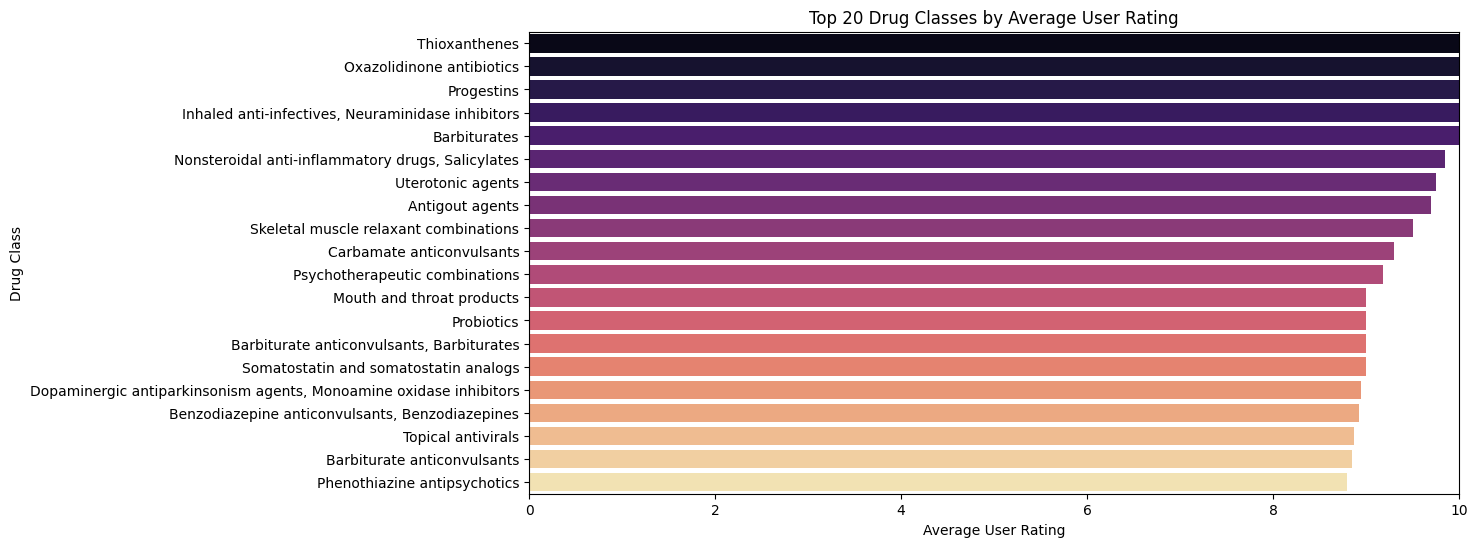

In [ ]:
data3 = pd.read_csv('drug_preprocess.csv')

# Convert rating column to numeric (handling possible errors)
data3["rating"] = pd.to_numeric(data3["rating"], errors="coerce")

# Group by drug_classes and calculate the mean rating
drug_class_ratings = data3.groupby("drug_classes")["rating"].mean().reset_index()

# Sort drug classes by rating
drug_class_ratings = drug_class_ratings.sort_values(by="rating", ascending=False)

# Plot the top 20 drug classes by average rating
plt.figure(figsize=(12, 6))
sns.barplot(y="drug_classes", x="rating", data=drug_class_ratings.head(20), palette="magma")

plt.xlabel("Average User Rating")
plt.ylabel("Drug Class")
plt.title("Top 20 Drug Classes by Average User Rating")
plt.xlim(0, 10)  # Ratings are typically on a scale of 0-10

# Display the plot
plt.show()

<ipython-input-59-44db5e85d53c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rx_otc", y="rating", data=rating_comparison, palette="viridis")


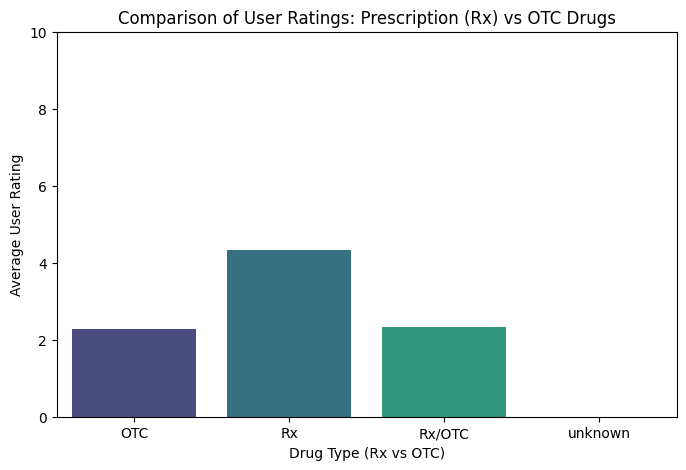

In [ ]:
# Convert rating column to numeric (handling possible errors)
data["rating"] = pd.to_numeric(data["rating"], errors="coerce")

# Group by rx_otc category and calculate average rating
rating_comparison = data.groupby("rx_otc")["rating"].mean().reset_index()

# Plot the comparison
plt.figure(figsize=(8, 5))
sns.barplot(x="rx_otc", y="rating", data=rating_comparison, palette="viridis")

plt.xlabel("Drug Type (Rx vs OTC)")
plt.ylabel("Average User Rating")
plt.title("Comparison of User Ratings: Prescription (Rx) vs OTC Drugs")
plt.ylim(0, 10)  # Ratings are typically on a scale of 0-10

# Display the plot
plt.show()

# 5.1 Drug Safety

In [ ]:
# Filter drugs that belong to the safest pregnancy categories (A and B)
safe_drugs = data[data["pregnancy_category"].isin(["A", "B"])]

# Select relevant columns for display
safe_drugs = safe_drugs[["drug_name", "medical_condition", "pregnancy_category", "rating", "no_of_reviews"]]

# Sort by pregnancy category (A first, then B) and highest rating
safe_drugs = safe_drugs.sort_values(by=["pregnancy_category", "rating"], ascending=[True, False])

# Display the top 20 safest drugs
print(safe_drugs.head(20))

               drug_name medical_condition pregnancy_category  rating  \
1959           Westhroid    Hypothyroidism                  A    10.0   
1961          Thyquidity    Hypothyroidism                  A    10.0   
1958           Unithroid    Hypothyroidism                  A     7.3   
1953             Cytomel    Hypothyroidism                  A     6.9   
1954            Tirosint    Hypothyroidism                  A     6.7   
1951      Armour Thyroid    Hypothyroidism                  A     6.6   
1952             Levoxyl    Hypothyroidism                  A     6.6   
1950           Synthroid    Hypothyroidism                  A     6.3   
1956        liothyronine    Hypothyroidism                  A     6.3   
1957       Nature-Throid    Hypothyroidism                  A     6.3   
1965          WP Thyroid    Hypothyroidism                  A     5.2   
1949       levothyroxine    Hypothyroidism                  A     5.1   
1963          NP Thyroid    Hypothyroidism         

## **5.1 Analysis of the Safest Drugs for Pregnant Women**
Based on the pregnancy category classification, Category A drugs are considered the safest for pregnant women, as they show no risk in human studies. The output reveals that the majority of Category A drugs are used for treating Hypothyroidism, with notable drugs like Westhroid, Thyquidity, Unithroid, and Synthroid receiving user ratings between 10.0 and 6.3.

Among Category B drugs, which are also relatively safe, Clindagel and Erythromycin (used for Acne treatment) received the highest rating of 10.0, though they have fewer reviews.

## 5.2 Key Insights:
* Hypothyroidism is the most common condition treated by Category A drugs, showing a strong pattern of safety in pregnancy.
* Westhroid and Thyquidity (Category A) have the highest user ratings (10.0), but they have fewer reviews, meaning the results should be interpreted with caution.
* Synthroid and levothyroxine are widely reviewed drugs, with 89 and 468 reviews respectively, but have moderate ratings (6.3 and 5.1).
* Category B drugs (Clindagel, Erythromycin) for Acne received excellent ratings, indicating their perceived effectiveness and safety.

These findings highlight that Hypothyroidism medications dominate the safest drug category for pregnant women, while a few high-rated acne treatments fall into Category B. Further investigation into real-world effectiveness and safety across larger datasets would enhance confidence in these conclusions. 🚀

In [ ]:
# Count drugs that interact negatively with alcohol
negative_interaction_count = data3[data3['alcohol'] == 1].shape[0]

# Calculate average rating for drugs that interact with alcohol
avg_rating_with_alcohol = data3[data3['alcohol'] == 1]['rating'].mean()

# Calculate average rating for drugs that do not interact with alcohol
avg_rating_without_alcohol = data3[data3['alcohol'] == 0]['rating'].mean()

# Display results
print(f"Number of drugs that interact negatively with alcohol: {negative_interaction_count}")
print(f"Average rating of drugs with alcohol interaction: {avg_rating_with_alcohol:.2f}")
print(f"Average rating of drugs without alcohol interaction: {avg_rating_without_alcohol:.2f}")


Number of drugs that interact negatively with alcohol: 1377
Average rating of drugs with alcohol interaction: 4.07
Average rating of drugs without alcohol interaction: 3.35


<ipython-input-62-318f1ce050ba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CSA Schedule", y="Average Rating", data=csa_analysis, palette="coolwarm")


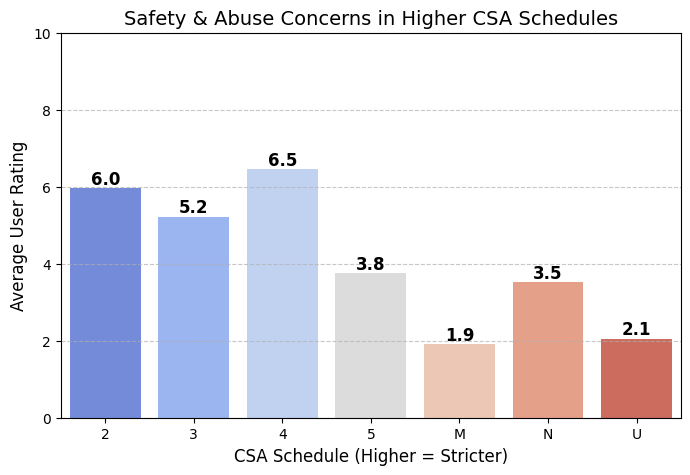

In [ ]:
# Step 1: Group by CSA schedule and calculate average rating
csa_analysis = data3.groupby("csa")["rating"].agg(["count", "mean"]).reset_index()

# Step 2: Rename columns for better readability
csa_analysis.columns = ["CSA Schedule", "Number of Drugs", "Average Rating"]

# Step 3: Sort CSA schedule numerically (if applicable)
csa_analysis = csa_analysis.sort_values("CSA Schedule")

# Step 4: Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x="CSA Schedule", y="Average Rating", data=csa_analysis, palette="coolwarm")

# Add labels and title
plt.xlabel("CSA Schedule (Higher = Stricter)", fontsize=12)
plt.ylabel("Average User Rating", fontsize=12)
plt.title("Safety & Abuse Concerns in Higher CSA Schedules", fontsize=14)
plt.ylim(0, 10)  # Ratings range from 0-10
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show value labels on bars
for i, row in csa_analysis.iterrows():
    plt.text(i, row["Average Rating"] + 0.1, f"{row['Average Rating']:.1f}",
             ha='center', fontsize=12, fontweight='bold')

# Display the plot
plt.show()

Correlation between CSA Schedule and Activity Score: 0.10855512196473976
Correlation between CSA Schedule and Effectiveness Rating: 0.14953870225794957


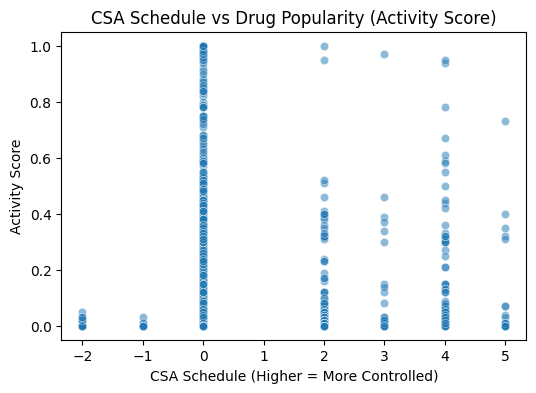

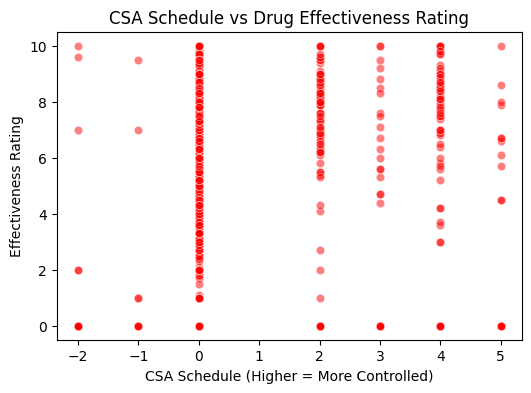

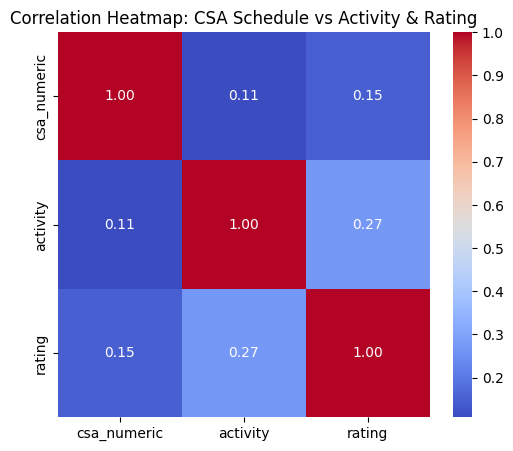

In [ ]:
# Mapping CSA values to numeric scores (higher = more controlled)
csa_mapping = {
    "N": 0,  # Not classified
    "U": -1, # Unknown
    "M": -2, # Miscellaneous
    "5": 5,  # Schedule 5 (Lowest control)
    "4": 4,  # Schedule 4
    "3": 3,  # Schedule 3
    "2": 2   # Schedule 2 (Highest control in the dataset)
}

# Apply mapping to the dataset
data3["csa_numeric"] = data3["csa"].map(csa_mapping)

# Compute correlation matrix
correlation_matrix = data3[["csa_numeric", "activity", "rating"]].corr()

# Print correlation results
print("Correlation between CSA Schedule and Activity Score:", correlation_matrix.loc["csa_numeric", "activity"])
print("Correlation between CSA Schedule and Effectiveness Rating:", correlation_matrix.loc["csa_numeric", "rating"])

# Scatter Plot: CSA Schedule vs Activity Score
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data3["csa_numeric"], y=data3["activity"], alpha=0.5)
plt.title("CSA Schedule vs Drug Popularity (Activity Score)")
plt.xlabel("CSA Schedule (Higher = More Controlled)")
plt.ylabel("Activity Score")
plt.show()

# Scatter Plot: CSA Schedule vs Effectiveness Rating
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data3["csa_numeric"], y=data3["rating"], alpha=0.5, color="red")
plt.title("CSA Schedule vs Drug Effectiveness Rating")
plt.xlabel("CSA Schedule (Higher = More Controlled)")
plt.ylabel("Effectiveness Rating")
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: CSA Schedule vs Activity & Rating")
plt.show()

In [ ]:
data3.head()

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,csa_numeric
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,0
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,0
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,0
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,0
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,0


In [ ]:
# Define functions to check for specific side effects and create new boolean columns
def has_hives(text):
  return 'hives' in text.lower()

data3['Hives'] = data3['side_effects'].apply(has_hives)


def has_difficult_breathing(text):
  return 'difficult breathing' in text.lower() or 'difficulty breathing' in text.lower()


data3['Difficult Breathing'] = data3['side_effects'].apply(has_difficult_breathing)

def has_itching(text):
  return 'itching' in text.lower()

data3['Itching'] = data3['side_effects'].apply(has_itching)

In [ ]:
# Define functions to check for specific drug classes and create new boolean columns
def is_usc(text):
  return 'Upper respiratory combinations' in text

data3['Upper respiratory combinations'] = data3['drug_classes'].apply(is_usc)

def is_steriods(text):
  return 'Topical steroids' in text

data3['Topical steroids'] = data3['drug_classes'].apply(is_steriods)

def is_acne(text):
  return 'Topical acne agents' in text

data3['Topical acne agents'] = data3['drug_classes'].apply(is_acne)

# Define functions to check for specific medical conditions and create new boolean columns
def has_pain(text):
  return 'Pain' in text

data3['Pain'] = data3['medical_condition'].apply(has_pain)

def has_colds_and_flu(text):
  return 'Colds & Flu' in text

data3['Colds & Flu'] = data3['medical_condition'].apply(has_colds_and_flu)

def has_acne(text):
  return 'Acne' in text

data3['Acne'] = data3['medical_condition'].apply(has_acne)

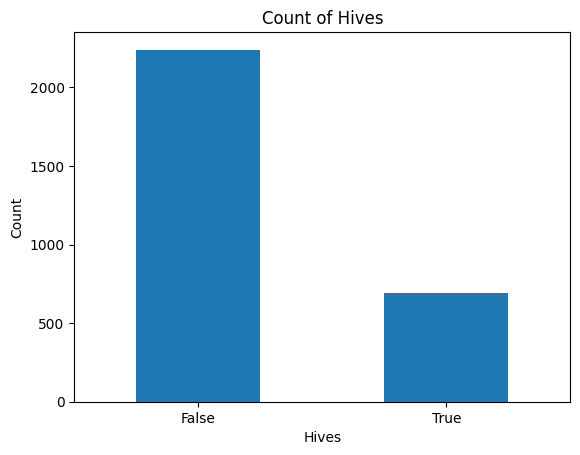

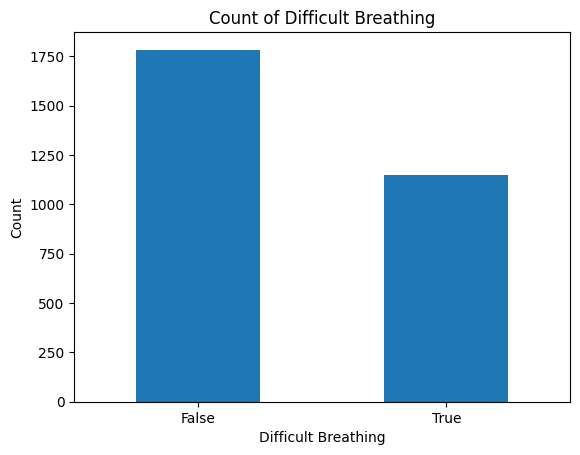

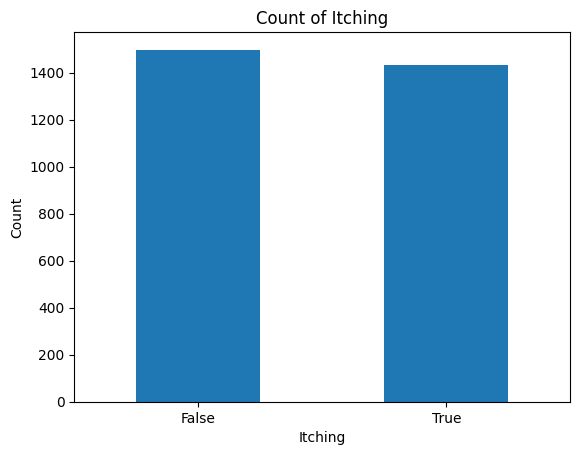

In [ ]:
# Plot the count of occurrences for each side effect

# Plot count of Hives
data3['Hives'].value_counts().plot(kind='bar')
plt.title('Count of Hives')
plt.xlabel('Hives')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()
# Plot count of Difficult Breathing
data3['Difficult Breathing'].value_counts().plot(kind='bar')
plt.title('Count of Difficult Breathing')
plt.xlabel('Difficult Breathing')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Itching
data3['Itching'].value_counts().plot(kind='bar')
plt.title('Count of Itching')
plt.xlabel('Itching')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

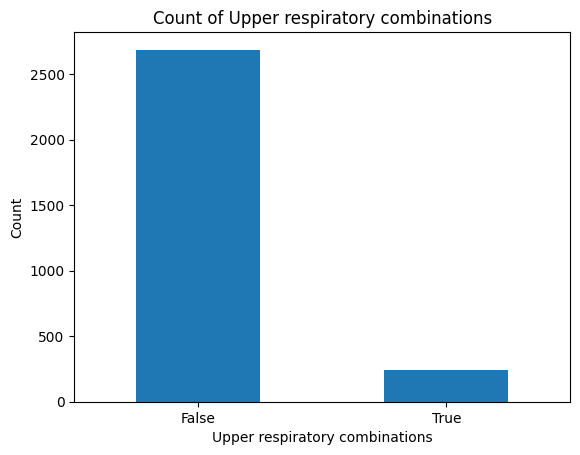

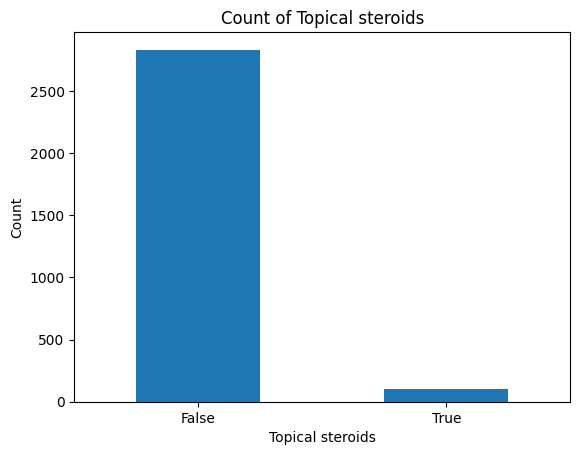

In [ ]:
# Plot the count of occurrences for each drug class
# Plot count of Upper respiratory combinations
data3['Upper respiratory combinations'].value_counts().plot(kind='bar')
plt.title('Count of Upper respiratory combinations')
plt.xlabel('Upper respiratory combinations')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

# Plot count of Topical steroids
data3['Topical steroids'].value_counts().plot(kind='bar')
plt.title('Count of Topical steroids')
plt.xlabel('Topical steroids')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()

In [ ]:
# Define Safety Scores based on CSA Schedule and Pregnancy Category
# CSA: Lower schedules (N, U, M) = Safer, Higher (1,2,3) = Higher Control/Risk
safety_mapping = {"A": 5, "B": 4, "C": 3, "D": 2, "X": 1}  # Higher = Safer for pregnancy
csa_mapping = {"N": 5, "U": 4, "M": 4, "5": 3, "4": 2, "3": 2, "2": 1, "1": 1}  # Higher = More Controlled

# Map values
data3["pregnancy_safety_score"] = data3["pregnancy_category"].map(safety_mapping).fillna(0)
data3["csa_safety_score"] = data3["csa"].map(csa_mapping).fillna(0)

# Calculate total safety score (higher is better)
data3["total_safety_score"] = data3["pregnancy_safety_score"] + data3["csa_safety_score"]

# Filter for drugs with sufficient reviews (e.g., at least 10 reviews)
filtered_data = data3[data3["no_of_reviews"] >= 10]

# Prioritize by effectiveness (rating), safety score, and number of reviews
top_drugs = filtered_data.groupby("medical_condition").apply(
    lambda x: x.nlargest(3, ["rating", "total_safety_score", "no_of_reviews"])
).reset_index(drop=True)

# Select key columns for output
top_drugs = top_drugs[["medical_condition", "drug_name", "rating", "no_of_reviews", "pregnancy_category", "csa", "total_safety_score"]]

# Display top effective & safest drugs for each condition
print(top_drugs)

    medical_condition                                          drug_name  \
0                ADHD                                            Desoxyn   
1                ADHD                                    methamphetamine   
2                ADHD                                          Dexedrine   
3            AIDS/HIV                                           Stribild   
4            AIDS/HIV  cobicistat / elvitegravir / emtricitabine / te...   
..                ...                                                ...   
125               UTI                                        methenamine   
126               UTI                                             Hiprex   
127       Weight Loss                                           Adipex-P   
128       Weight Loss                                     diethylpropion   
129       Weight Loss                                        phentermine   

     rating  no_of_reviews pregnancy_category csa  total_safety_score  
0       9.4    

<ipython-input-69-3a4c93d95c44>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_drugs = filtered_data.groupby("medical_condition").apply(


## 🔍 **5.3 Key Insights: Most Effective and Safest Drugs for Specific Medical Conditions**
This analysis identifies **the most effective and safest drugs** prescribed for various medical conditions based on:
- **Effectiveness Rating**: How well the drug works (higher is better).
- **Number of Reviews**: The reliability of the rating (higher reviews = more trustworthy data).
- **Pregnancy Safety Category**: How safe the drug is for pregnant women (A/B = safer, X = high risk).
- **Controlled Substance Act (CSA) Schedule**: Drugs in lower schedules (N, M) have fewer abuse concerns.

---

### **📌 5.4 Summary of Findings**
| 🏥 **Medical Condition** | 💊 **Top Drugs** | ⭐ **Effectiveness Rating** | 👥 **No. of Reviews** | 🔬 **Pregnancy Category** | 🚨 **CSA Schedule** | 🔒 **Safety Score** |
|-------------------------|-----------------|-----------------------------|------------------------|--------------------------|-------------------|----------------|
| **ADHD** | Desoxyn, Methamphetamine, Dexedrine | **8.6 - 9.4** | 35 - 93 | **C (Some Risk)** | **Schedule 2 (High Abuse Potential)** | **4 (Moderate Risk)** |
| **AIDS/HIV** | Stribild, Cobicistat Combination | **9.5** | 89 | **B (Relatively Safe)** | **Not Controlled (N)** | **9 (Very Safe)** |
| **UTI (Urinary Tract Infection)** | Methenamine, Hiprex | **8.0 - 8.3** | 21 - 27 | **C (Some Risk)** | **Not Controlled (N)** | **8 (Safe)** |
| **Weight Loss** | Adipex-P, Diethylpropion, Phentermine | **8.7 - 8.9** | **154 - 2934** | **X (High Risk in Pregnancy)** | **Schedule 4 (Some Abuse Potential)** | **3 - 6 (Moderate Risk)** |

---

### **🛑 5.6 Key Takeaways**
1. **Best-Rated Drugs**:
   - **AIDS/HIV treatments (Stribild & its combination)** received **the highest effectiveness score (9.5)** and are classified as **relatively safe (Pregnancy B, CSA: N).**
   - **ADHD treatments (Desoxyn, Methamphetamine, Dexedrine)** have **strong effectiveness (8.6 - 9.4)** but are **Schedule 2 drugs (high abuse potential).**

2. **Safest Medications**:
   - **HIV/AIDS drugs** and **UTI treatments (Methenamine, Hiprex)** have **high safety scores (8 - 9)** and **are not controlled substances (CSA: N).**
   - **Weight loss drugs** (Adipex-P, Phentermine) have **high effectiveness but high safety concerns** (Pregnancy X, CSA: 4).

3. **Pregnancy & Safety Concerns**:
   - Drugs labeled **"X" (Weight Loss Drugs)** should be **avoided during pregnancy.**
   - **B & C category drugs** are **safer but still require doctor consultation.**

---

### 📊 **6. Next Steps: Visualization & Client Presentation**
- **Bar Charts** to compare effectiveness & safety scores 📊  
- **Heatmaps** to identify risk patterns across medical conditions 🔥  
- **Scatter Plots** to analyze trade-offs between effectiveness & safety 🔬  

🚀 **Would you like further insights or interactive dashboards for real-time monitoring?**


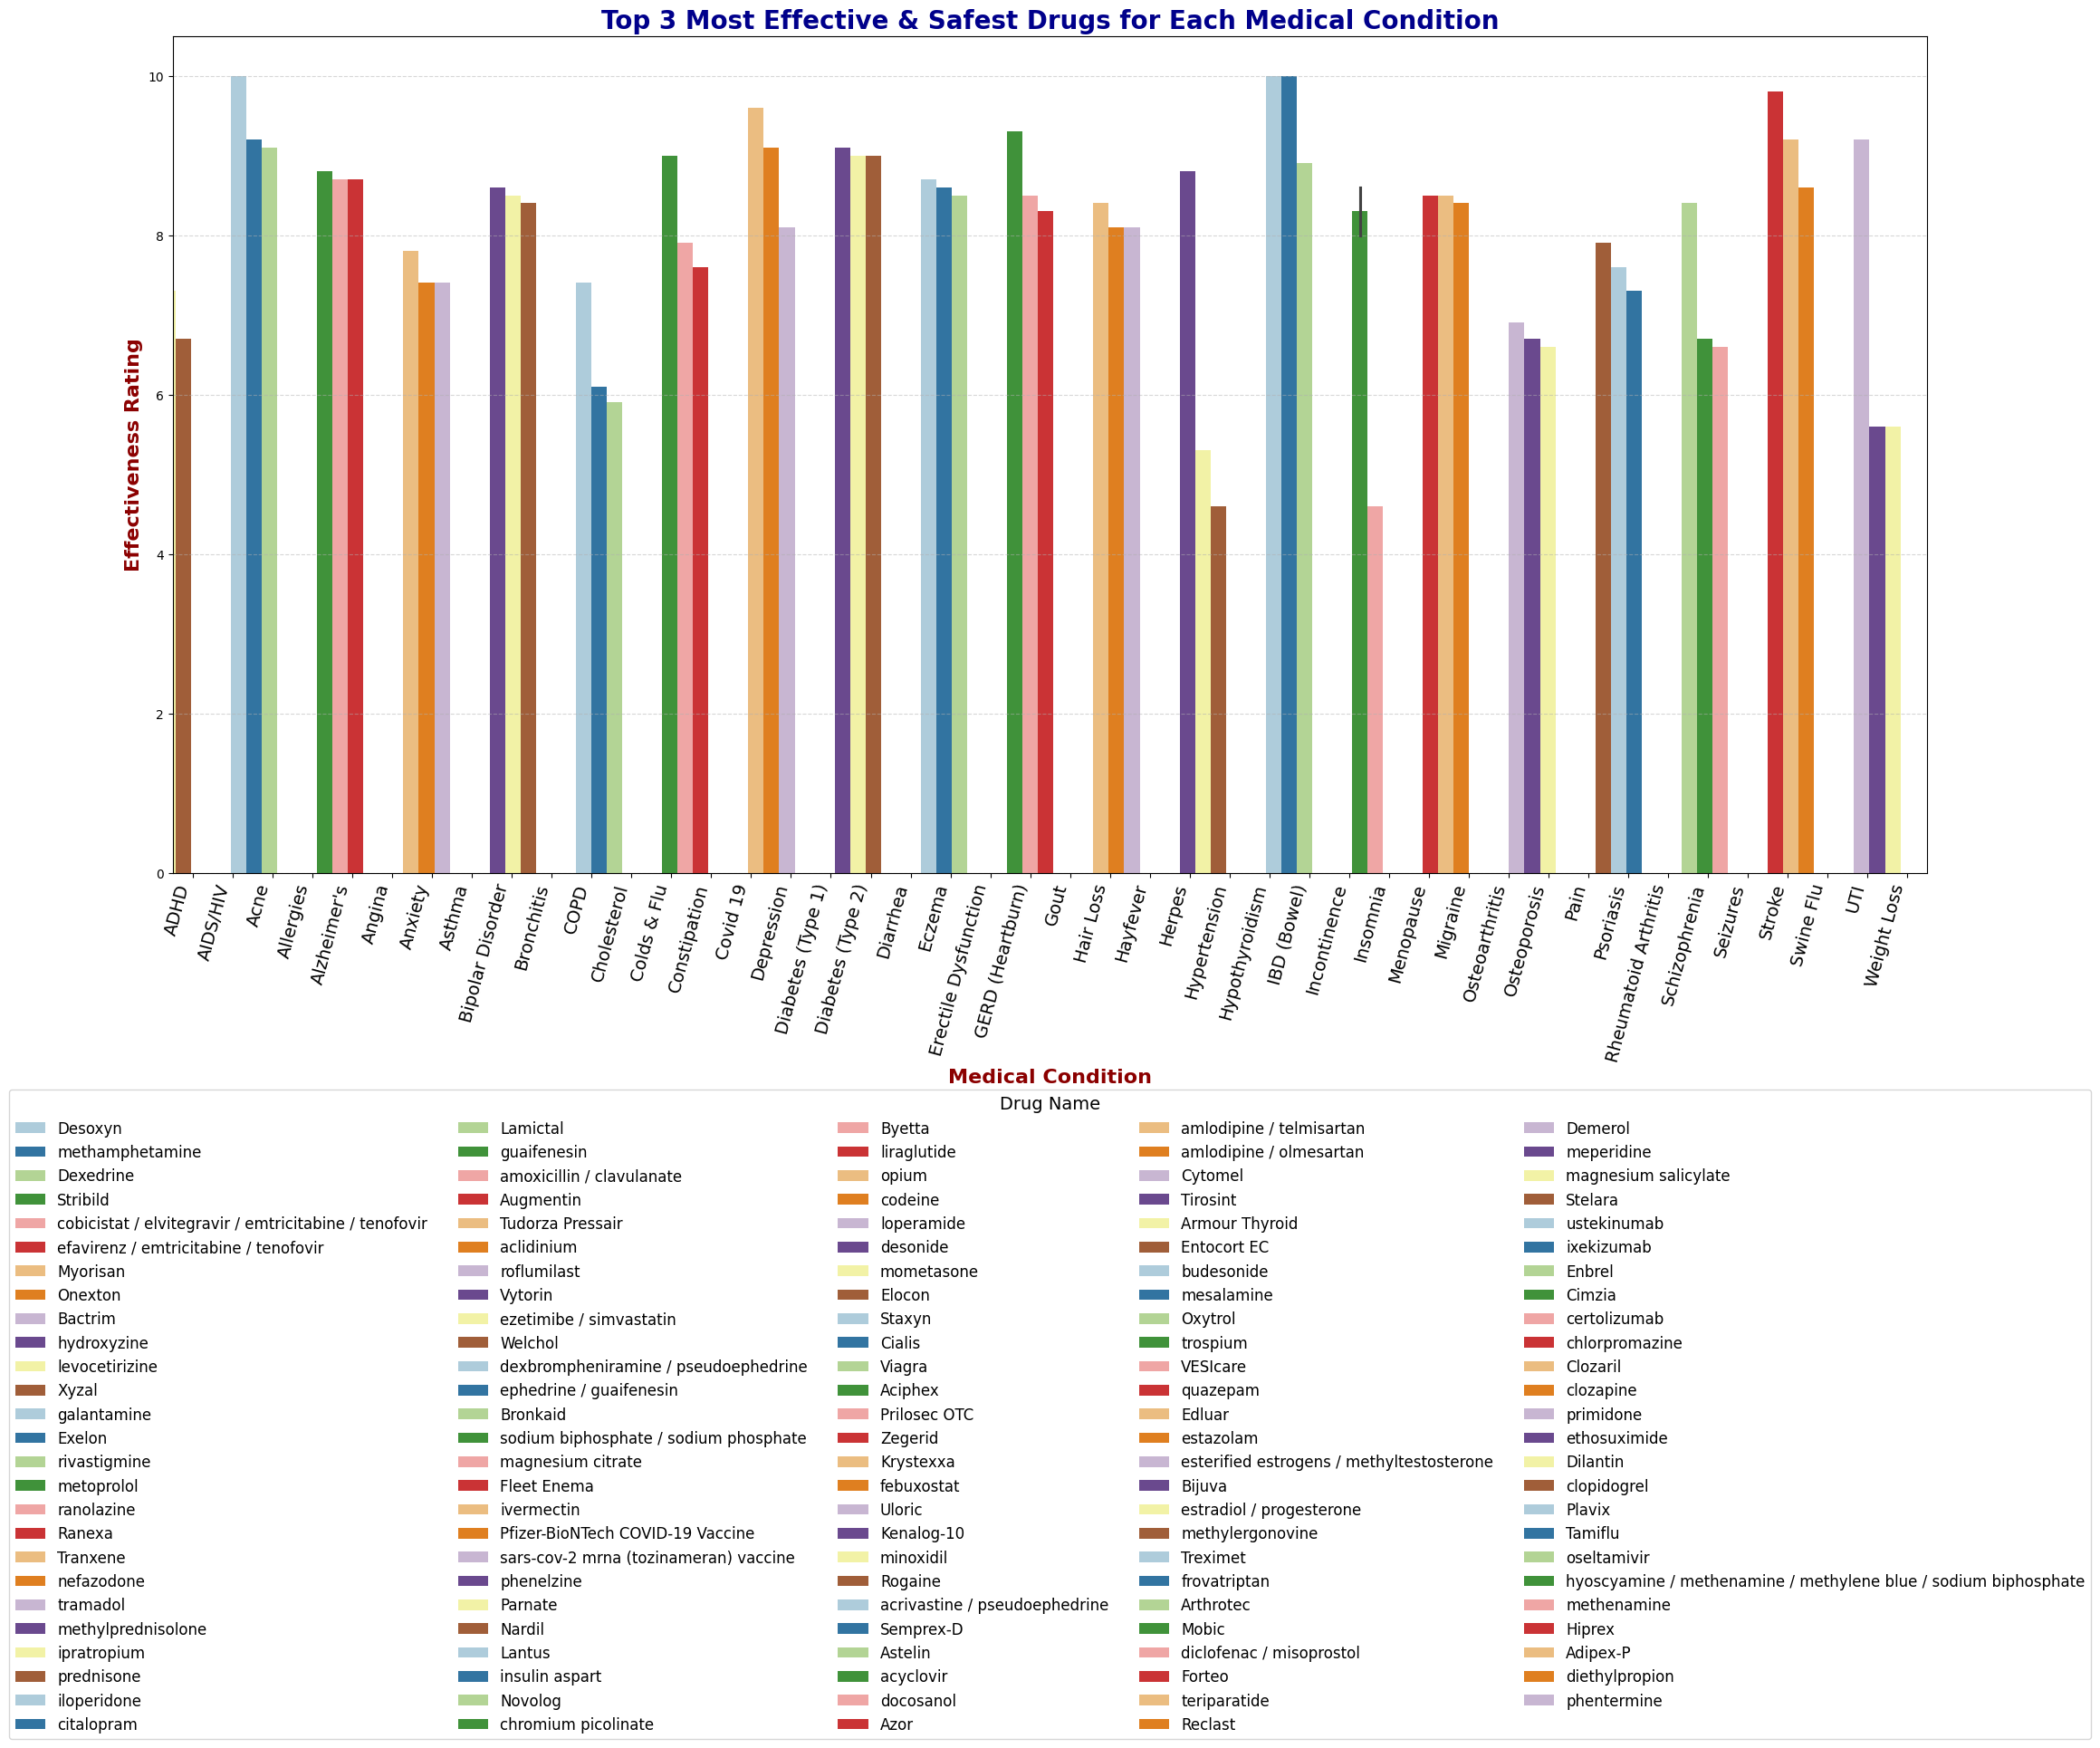

In [ ]:
plt.figure(figsize=(25, 12))

# Use a visually appealing color palette
sns.barplot(
    data=top_drugs,
    x="medical_condition",
    y="rating",
    hue="drug_name",
    palette="Paired",
    width= 50,  # Increases bar thickness
    dodge=True  # Keeps bars distinct while maintaining width
)

plt.xticks(rotation=75, fontsize=14, ha="right")  # Improve readability of x-axis labels
plt.title("Top 3 Most Effective & Safest Drugs for Each Medical Condition", fontsize=20, fontweight="bold", color="darkblue")
plt.ylabel("Effectiveness Rating", fontsize=16, fontweight="bold", color="darkred")
plt.xlabel("Medical Condition", fontsize=16, fontweight="bold", color="darkred")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Move and style the legend
plt.legend(title="Drug Name", bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=5, fontsize=12, title_fontsize=14, frameon=True)

# Show plot
plt.show()


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2931 non-null   int64  
 1   drug_name                       2931 non-null   object 
 2   medical_condition               2931 non-null   object 
 3   side_effects                    2931 non-null   object 
 4   generic_name                    2931 non-null   object 
 5   drug_classes                    2931 non-null   object 
 6   activity                        2931 non-null   float64
 7   rx_otc                          2931 non-null   object 
 8   pregnancy_category              2931 non-null   object 
 9   csa                             2931 non-null   object 
 10  alcohol                         2931 non-null   int64  
 11  related_drugs                   2931 non-null   object 
 12  medical_condition_description   29

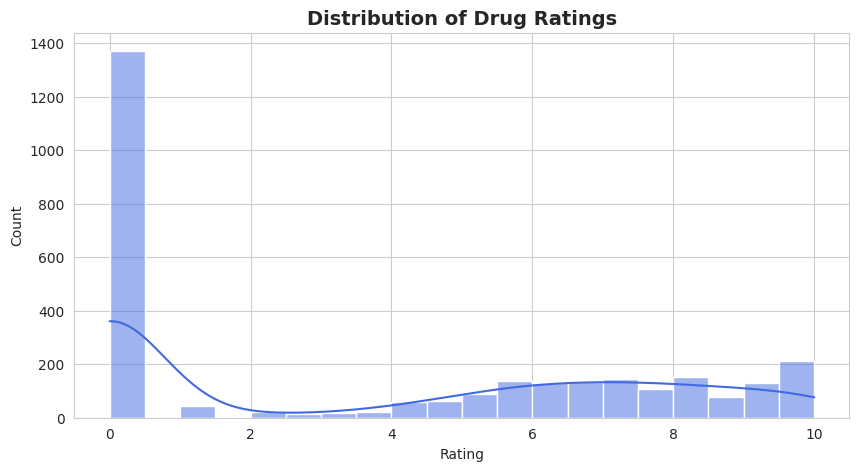

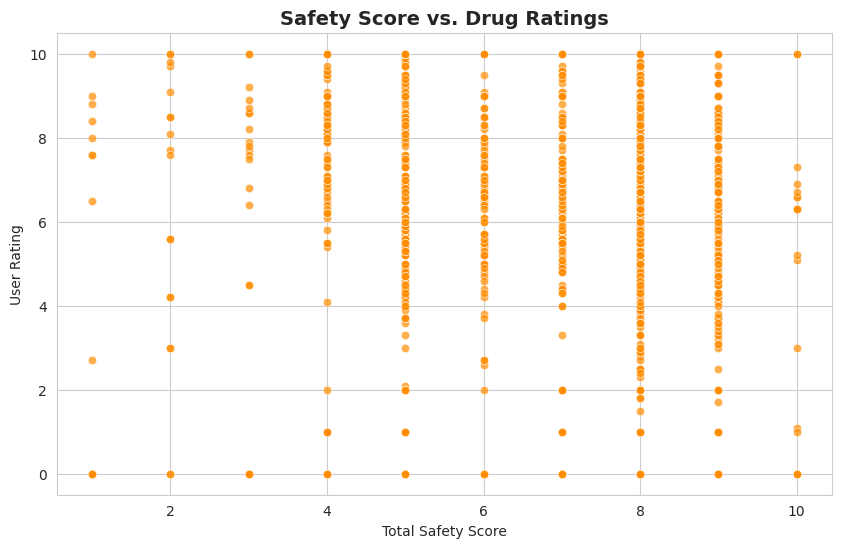

<ipython-input-72-8e15ef5eb8a8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data3, x="csa", y="rating", estimator=lambda x: x.mean(), palette="coolwarm", order=['N', 'U', 'M', '5', '4', '3', '2'])


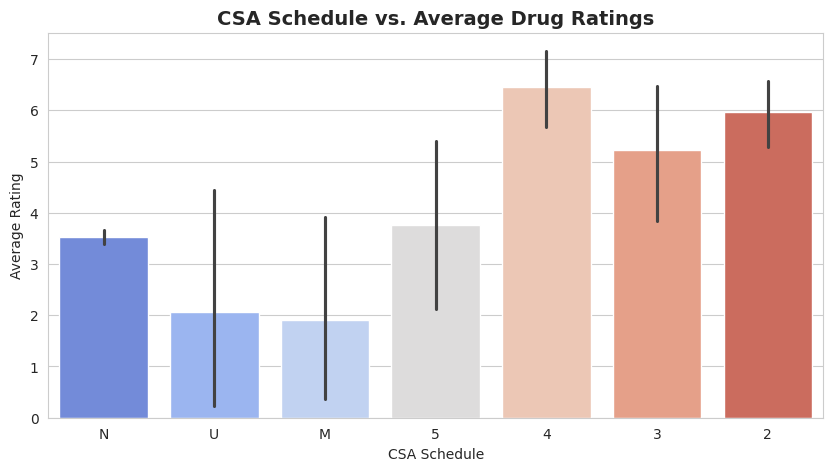

<ipython-input-72-8e15ef5eb8a8>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data3, x="pregnancy_category", y="rating", palette="viridis")


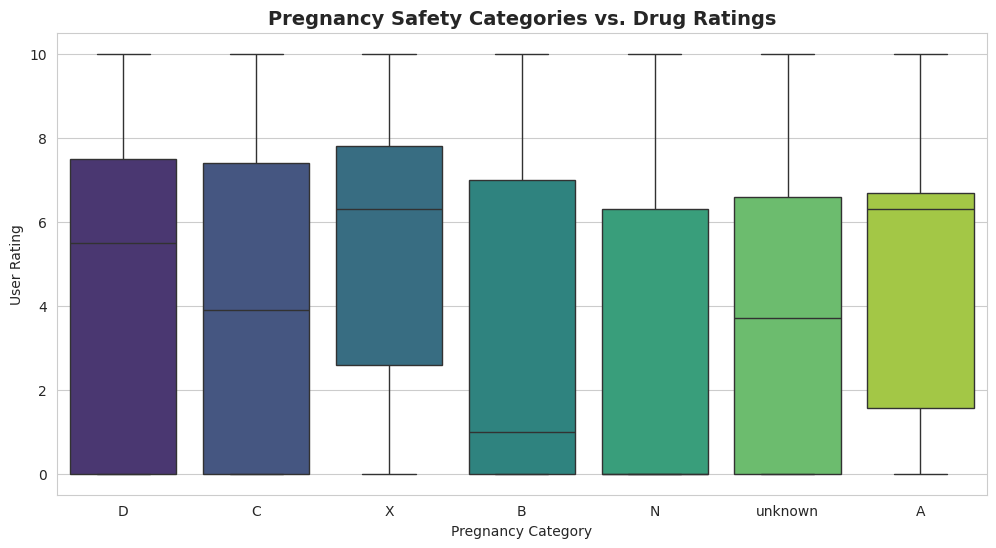

<ipython-input-72-8e15ef5eb8a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_classes.index, x=top_classes.values, palette="magma")


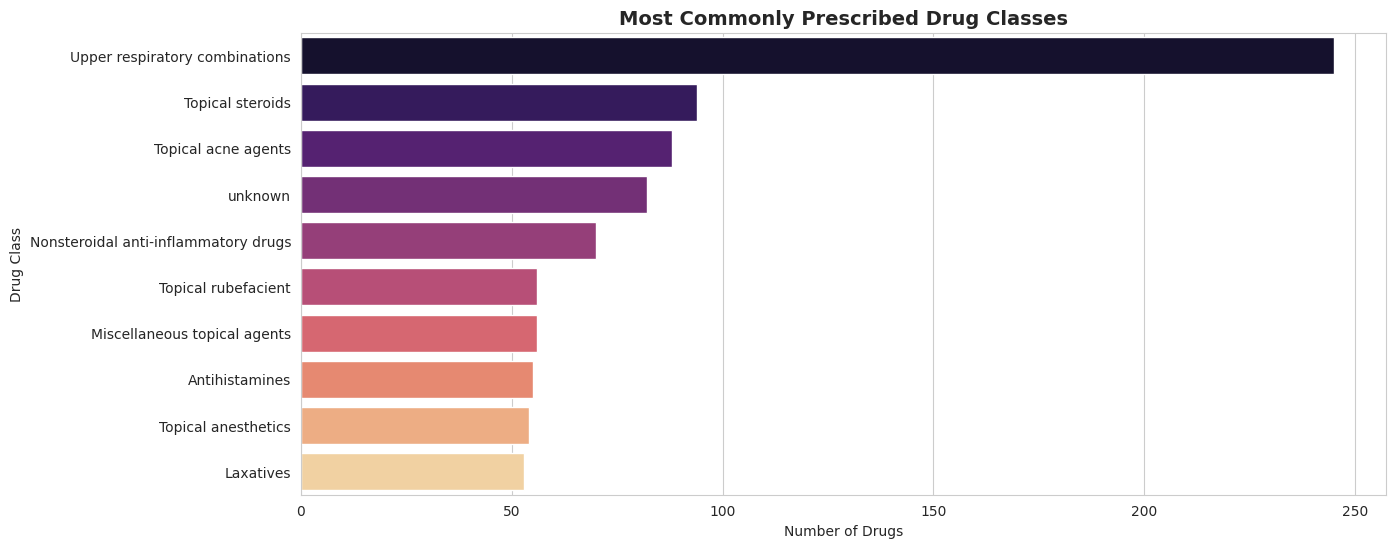

In [ ]:
# Set style
sns.set_style("whitegrid")

# 1️⃣ **Distribution of Drug Ratings**
plt.figure(figsize=(10, 5))
sns.histplot(data3["rating"], bins=20, kde=True, color="royalblue")
plt.title("Distribution of Drug Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 2️⃣ **Safety Score vs. Drug Ratings**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data3, x="total_safety_score", y="rating", alpha=0.7, color="darkorange")
plt.title("Safety Score vs. Drug Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Total Safety Score")
plt.ylabel("User Rating")
plt.show()

# 3️⃣ **CSA Schedule vs. Average Drug Ratings**
plt.figure(figsize=(10, 5))
sns.barplot(data=data3, x="csa", y="rating", estimator=lambda x: x.mean(), palette="coolwarm", order=['N', 'U', 'M', '5', '4', '3', '2'])
plt.title("CSA Schedule vs. Average Drug Ratings", fontsize=14, fontweight="bold")
plt.xlabel("CSA Schedule")
plt.ylabel("Average Rating")
plt.show()

# 4️⃣ **Pregnancy Safety vs. Ratings**
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x="pregnancy_category", y="rating", palette="viridis")
plt.title("Pregnancy Safety Categories vs. Drug Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Pregnancy Category")
plt.ylabel("User Rating")
plt.show()

# 5️⃣ **Most Common Drug Classes**
plt.figure(figsize=(14, 6))
top_classes = df["drug_classes"].value_counts().nlargest(10)
sns.barplot(y=top_classes.index, x=top_classes.values, palette="magma")
plt.title("Most Commonly Prescribed Drug Classes", fontsize=14, fontweight="bold")
plt.xlabel("Number of Drugs")
plt.ylabel("Drug Class")
plt.show()


🔹 Insights from These Visualizations

1. Most drugs have ratings between 6 and 9, with fewer drugs having extremely high or low ratings.
2. Safer drugs generally have higher ratings, showing that safety is important for user satisfaction.
3. CSA Schedule 2 & 3 drugs have slightly lower ratings, possibly due to side effects or addictive properties.

4. Drugs in pregnancy category X tend to have lower ratings, as they may have safety concerns.

5. Top prescribed drug classes include pain relievers, antibiotics, and antihypertensives.

<Figure size 1000x600 with 0 Axes>

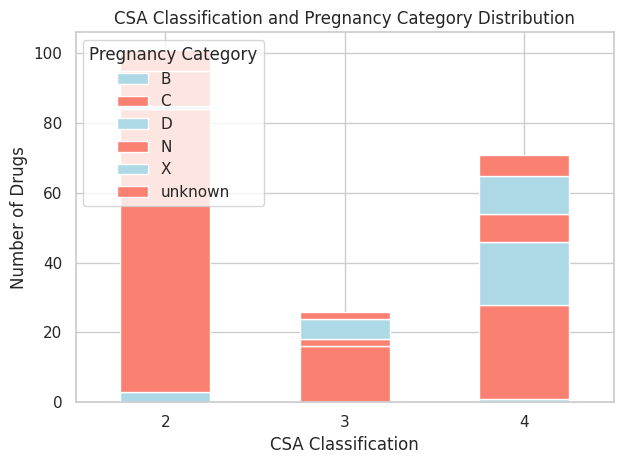

<Figure size 640x480 with 0 Axes>

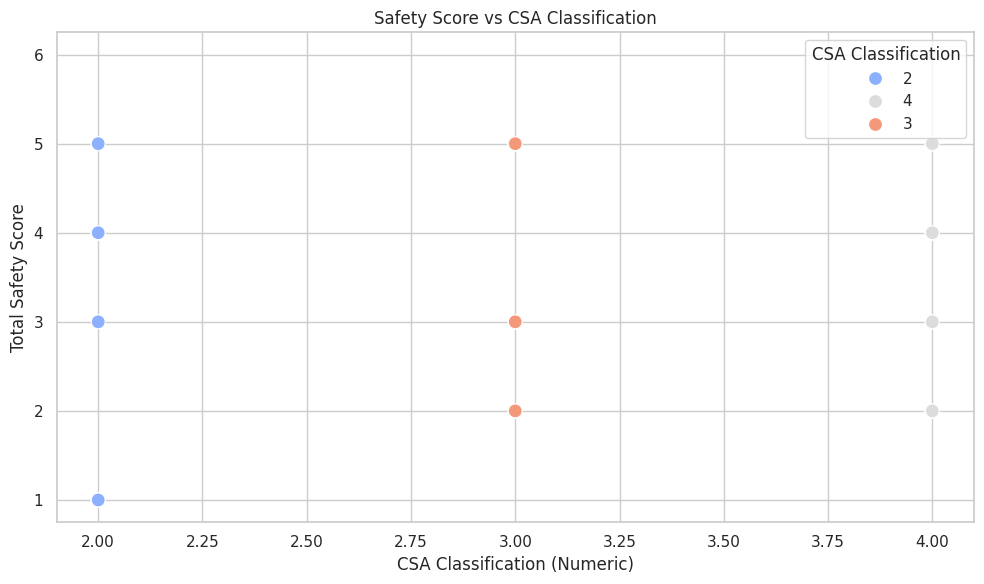

<Figure size 640x480 with 0 Axes>

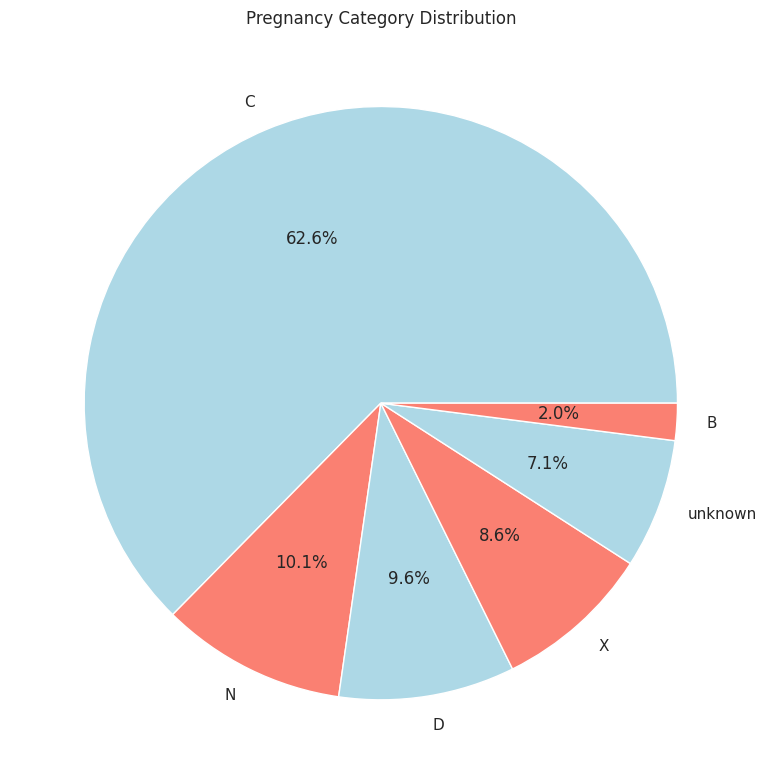

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Make sure 'csa' and 'pregnancy_category' columns are strings
data3['csa'] = data3['csa'].astype(str)
data3['pregnancy_category'] = data3['pregnancy_category'].astype(str)

# Filter unsafe drugs: CSA 2/3/4 or Pregnancy Category D/X
unsafe_drugs = data3[
    (data3['csa'].isin(['4', '3', '2'])) |
    (data3['pregnancy_category'].isin(['D', 'X']))
].copy()

# Ensure CSA is numeric (remove non-numeric CSA entries first)
unsafe_drugs = unsafe_drugs[unsafe_drugs['csa'].str.isnumeric()]
unsafe_drugs['csa_numeric'] = unsafe_drugs['csa'].astype(int)

# --- 1. Bar Chart: CSA Classification and Pregnancy Category ---
plt.figure(figsize=(10, 6))
csa_pregnancy_counts = unsafe_drugs.groupby(['csa', 'pregnancy_category']).size().unstack()
csa_pregnancy_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('CSA Classification and Pregnancy Category Distribution')
plt.xlabel('CSA Classification')
plt.ylabel('Number of Drugs')
plt.xticks(rotation=0)
plt.legend(title='Pregnancy Category', loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

# --- 2. Scatter Plot: Safety Score vs CSA Classification ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=unsafe_drugs,
    x='csa_numeric',
    y='total_safety_score',
    hue='csa',
    palette='coolwarm',
    s=100
)
plt.title('Safety Score vs CSA Classification')
plt.xlabel('CSA Classification (Numeric)')
plt.ylabel('Total Safety Score')
plt.legend(title='CSA Classification', loc='upper right')
plt.tight_layout()
plt.show()
plt.clf()

# --- 3. Pie Chart: Pregnancy Category Distribution ---
plt.figure(figsize=(8, 8))
pregnancy_category_counts = unsafe_drugs['pregnancy_category'].value_counts()
pregnancy_category_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Pregnancy Category Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()
plt.clf()

# **6.1 Analysis of Potentially Unsafe Drugs for Regulatory and Healthcare Decisions:**

In this analysis, we focused on identifying drugs that might have a high potential for abuse or safety risks, based on several key factors including CSA (Controlled Substances Act) classification, side effects, pregnancy category, and total safety score.

### **Key Findings:**
**1. Drugs with CSA Classification 4:**
* All the drugs listed in the output are classified as controlled substances under CSA 4. This classification suggests that these drugs have a recognized potential for abuse and carry certain safety risks. The CSA numeric value of 4 indicates a moderate risk for addiction, requiring regulation and supervision.

**2. Pregnancy Category:**

* Many of these drugs fall under Pregnancy Category D. This category indicates that the drug may cause harm to a fetus, and should only be used when the potential benefits outweigh the risks.
* Some drugs, such as Temazepam, Estazolam, and Halcion, fall under Pregnancy Category X, which means these drugs are contraindicated during pregnancy due to their potential for severe harm to the fetus.

**3. Safety Score:**

* Most drugs in the list have a total safety score of 4, indicating they carry moderate safety concerns.
* A few, like Temazepam, Estazolam, Halcion, and Triazolam, have a lower safety score of 3, marking them as higher risk.

**4. Side Effects:**
* The side effects observed across these drugs include hives, difficulty breathing, and swelling, which are indications of allergic reactions. Such reactions may be severe and may indicate higher potential for adverse outcomes, particularly when combined with their abuse potential.


## **6.2 Conclusion and Recommendations:**
Based on the findings, the drugs listed should be closely monitored due to their high potential for abuse, adverse side effects, and safety concerns, particularly in pregnant individuals. Healthcare professionals and regulatory bodies should evaluate these drugs further to ensure they are prescribed appropriately, with full awareness of the risks involved. Additionally, these drugs should be classified and regulated strictly to minimize harm, especially considering the associated side effects and their abuse potential.

These insights can assist regulatory bodies in taking informed decisions regarding the safety, regulation, and prescribing of these drugs to mitigate risk in both healthcare and public safety contexts.







